In [5]:
from python_speech_features import (
    mfcc,
    delta,
    logfbank
)
import scipy.io.wavfile as wav
import pandas as pd
import matplotlib.pyplot as plt

DATA_DIR = '../categorized_data/'
    

def get_mfcc_feat(fpath):
    (rate, sig) = wav.read(fpath)
    mfcc_feat = mfcc(sig, rate, numcep = 13)
    #    d_mfcc_feat = delta(mfcc_feat, 2)
    return mfcc_feat

    
spotcheck_file = DATA_DIR + "F_1337ad-20170321-ajg_en-0535.wav"

dmf = get_mfcc_feat(spotcheck_file)
print dmf.shape

(599, 13)


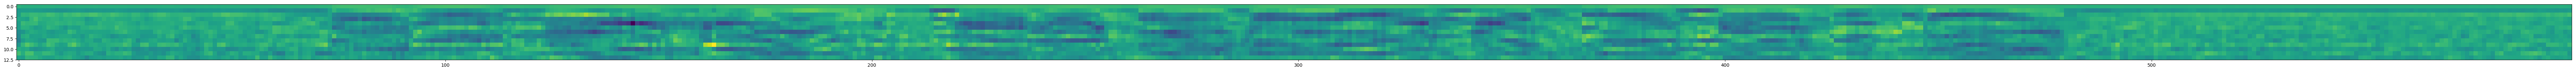

In [6]:
%matplotlib inline
import numpy as np

plt.figure(figsize=(100, 100), dpi=100)
plt.imshow(dmf.transpose())

In [16]:
dmf.shape

(599, 13)

In [17]:
import glob
# Ride that wav
wavs = [f for f in glob.glob(DATA_DIR + '*')]
print 'Female voices count  : %d' % len([wav for wav in wavs if '/F_' in wav])
print 'Male voice count     : %d' % len([wav for wav in wavs if '/M_' in wav])

SAMPLE_NUM = 15500

from random import shuffle

shuffle(wavs)

vox = [wav for wav in wavs if '/F_' in wav][:SAMPLE_NUM]
vox.extend([wav for wav in wavs if '/M_' in wav][:SAMPLE_NUM])
shuffle(vox)
print 'Example files'
vox[1:10]

Female voices count  : 18760
Male voice count     : 63747


['../categorized_data/F_cmu_us_bdl_arctic_arctic_b0144.wav',
 '../categorized_data/F_cmu_us_bdl_arctic_arctic_a0359.wav',
 '../categorized_data/M_rifter-20080127-rsq_a0593.wav',
 '../categorized_data/M_Francisco-20120123-vsa_a0188.wav',
 '../categorized_data/M_craniumonempty-20100314-vfp_b0419.wav',
 '../categorized_data/F_cmu_us_jmk_arctic_arctic_b0154.wav',
 '../categorized_data/M_anonymous-20100108-eee_b0249.wav',
 '../categorized_data/M_Firefox005-20100820-jgs_a0481.wav',
 '../categorized_data/M_ttm-20071102_md0002.wav']

In [18]:
import scipy.io.wavfile as wav
XY = np.array([(get_mfcc_feat(v), 'M' if '/M' in v else 'F') for v in vox])

In [19]:
x_train = np.random.random((1000, 20, 10))
x_train.shape

(1000, 20, 10)

In [20]:
# Require at least 300 obs
print '%d observations longer than 300 frames' % len([x[0].shape[0] for x in XY if x[0].shape[0] >= 300])

print 'Balance: %s' % str(1.0*len([x[1] for x in XY if x[0].shape[0] >= 300 and x[1] == 'F'])/len([x[1] for x in XY if x[0].shape[0] >= 300]))

26524 observations longer than 300 frames
Balance: 0.454343236314


In [21]:
X, Y = [], []
for i in range(0, len(XY)):
    if XY[i][0].shape[0] >= 300:
        Y.append(XY[i][1]) # labels
        X.append(XY[i][0][:300]) # features

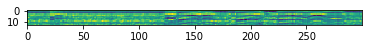

In [29]:
np.array(X).shape
plt.imshow(X[6].transpose())
Y = [[0, 1] if y == 'M' else [1, 0] for y in Y]

In [28]:
X = np.array(X)

In [34]:
Y = np.array(Y)

In [41]:
more_X = np.reshape(X, (X.shape[0], 1, X.shape[1], X.shape[2]))

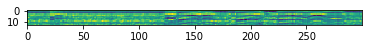

In [45]:
# Validate that the reshape went correctly
plt.imshow(more_X[6][0].transpose())
# Note that we add this 1 vector to explicitly tell Keras that the image lacks depth
# https://elitedatascience.com/keras-tutorial-deep-learning-in-python

In [46]:
print more_X.shape
print Y.shape

(26524, 1, 300, 13)
(26524, 2)


In [49]:
PCT_TRAIN = 0.75
last_obs_in_training = int(more_X.shape[0] * PCT_TRAIN)
X_train, X_test = more_X[:last_obs_in_training], more_X[last_obs_in_training:]
y_train, y_test = Y[:last_obs_in_training], Y[last_obs_in_training:]

In [75]:
np.save('X_train', X_train)
np.save('X_test', X_test)
np.save('y_train', y_train)
np.save('y_test', y_test)

In [72]:
import numpy

from keras import initializers

from keras.utils import np_utils

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D

K.set_image_dim_ordering('th')


model = Sequential()
 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,300,13)))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
 
# 8. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
# 9. Fit model on training data
model.fit(X_train, Y_train, 
          batch_size=32, nb_epoch=10, verbose=1)
 
# 10. Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=0)

ImportError: cannot import name np_utils